In [37]:
import numpy as np
import matplotlib.pyplot as plt

# disable warnings
import warnings
warnings.filterwarnings('ignore')

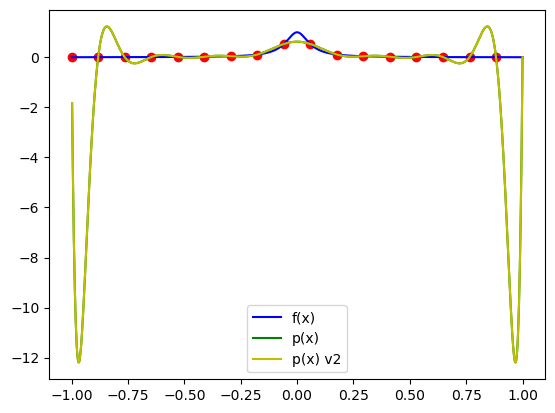

In [38]:
f = lambda x: 1/(1+(16*x)**2)

n = 17

X = np.array([-1 + ((i+1)-1)*2/n for i in range(n)])
Y = f(X)

# barycentric Lagrange interpolation weights
w = np.zeros(n)
for i in range(n):
    w[i] = np.prod([1/(X[i]-X[j]) for j in range(n) if j != i])

# barycentric Lagrange interpolation

# first version
def barycentric_lagrange():
    numerator = lambda x: np.sum([w[i]*Y[i]/(x-X[i]) for i in range(n)])
    denominator = lambda x: np.sum([w[i]/(x-X[i]) for i in range(n)])
    return lambda x: numerator(x)/denominator(x)

# second version
phi = lambda x: np.prod([x-X[i] for i in range(n)])
def barycentric_lagrange_v2():
    return lambda x: phi(x)*np.sum([w[i]*Y[i]/(x-X[i]) for i in range(n)])

p1 = barycentric_lagrange()
p2 = barycentric_lagrange_v2()

# plot
plt.plot(X, Y, 'ro')
X_ = np.linspace(-1, 1, 1000)
plt.plot(X_, f(X_), 'b', label='f(x)')
Y_ = [p1(x) for x in X_]
plt.plot(X_, Y_, 'g', label='p(x)')
Y_ = [p2(x) for x in X_]
plt.plot(X_, Y_, 'y', label='p(x) v2')
plt.legend()
plt.show()

In [39]:
# error plots
e1 = np.log10([np.abs(phi(x)) for x in X_])

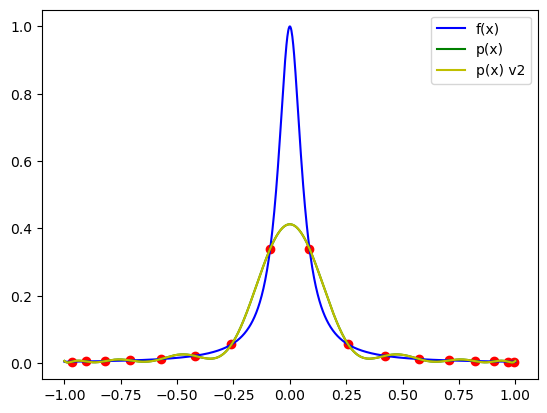

In [40]:
# using chebyshev nodes
X = np.array([np.cos((2*i+1)*np.pi/(2*(n + 1))) for i in range(n)])
Y = f(X)

phi = lambda x: np.prod([x-X[i] for i in range(n)])

w = np.zeros(n)
for i in range(n):
    w[i] = np.prod([1/(X[i]-X[j]) for j in range(n) if j != i])

p1 = barycentric_lagrange()
p2 = barycentric_lagrange_v2()

# plot
plt.plot(X, Y, 'ro')
X_ = np.linspace(-1, 1, 1000)
plt.plot(X_, f(X_), 'b', label='f(x)')
Y_ = [p1(x) for x in X_]
plt.plot(X_, Y_, 'g', label='p(x)')
Y_ = [p2(x) for x in X_]
plt.plot(X_, Y_, 'y', label='p(x) v2')
plt.legend()
plt.show()

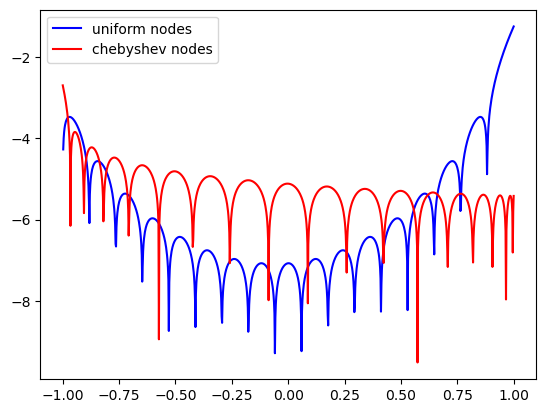

In [41]:
# error plots
e2 = np.log10([np.abs(phi(x)) for x in X_])

plt.plot(X_, e1, 'b', label='uniform nodes')
plt.plot(X_, e2, 'r', label='chebyshev nodes')
plt.legend()
plt.show()